In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2212,ham,This is one of the days you have a billion cla...,NaN,NaN,NaN
3185,ham,Happy birthday to you....dear.with lots of lov...,NaN,NaN,NaN
6652,spam,As a Registered Subscriber yr draw 4 a Â£100 g...,NaN,NaN,NaN
3788,ham,Are you sure you don't mean \get here,"we made you hold all the weed\""""",NaN,NaN
4179,ham,"swhrt how u dey,hope ur ok, tot about u 2day.l...",NaN,NaN,NaN


In [5]:
df.shape

(6699, 5)

## 1.Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6699 entries, 0 to 6698
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          6699 non-null   object
 1   v2          6699 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 261.8+ KB


In [7]:
# Dropping last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
3950,ham,Hi dude hw r u da realy mising u today
745,ham,Dunno he jus say go lido. Same time 930.
5807,spam,Are you unique enough? Find out from 30th Augu...
4021,ham,U gd lor go shopping i got stuff to do. U wan ...
5626,spam,Pvt Finance arranged on cheque basics 4 Busine...


In [9]:
# Renaming the Columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3245,ham,"Funny fact Nobody teaches volcanoes 2 erupt, t..."
3439,ham,What time you thinkin of goin?
5000,ham,"Nope. Since ayo travelled, he has forgotten hi..."
339,ham,U calling me right? Call my hand phone...
2618,ham,Hey pple...$700 or $900 for 5 nights...Excelle...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# Checking for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# Checking for duplicate values
df.duplicated().sum()

774

In [15]:
# Removing the duplicate
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5925, 2)

## 2.Exploratory Data Analysis

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4516
1    1409
Name: count, dtype: int64

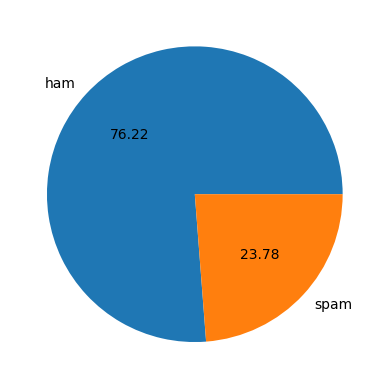

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
# Calculating number of words,characters and colums

In [22]:
import nltk

In [23]:
df['num_characters'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x))) 

In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) 

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5925.000000,5925.000000,5925.000000
mean,86.730633,19.519662,2.054684
std,59.250057,12.994266,1.470179
min,2.000000,1.000000,1.000000
25%,38.000000,10.000000,1.000000
50%,71.000000,17.000000,2.000000
75%,135.000000,28.000000,3.000000
max,910.000000,220.000000,38.000000


In [30]:
# Analysing Spam and Ham separately 

In [31]:
# for Ham messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# for spam messages

In [33]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1409.000000,1409.000000,1409.000000
mean,138.882186,27.198722,2.806246
std,31.846940,7.007522,1.487664
min,13.000000,2.000000,1.000000
25%,126.000000,24.000000,2.000000
50%,147.000000,28.000000,3.000000
75%,157.000000,31.000000,4.000000
max,387.000000,75.000000,9.000000


In [34]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

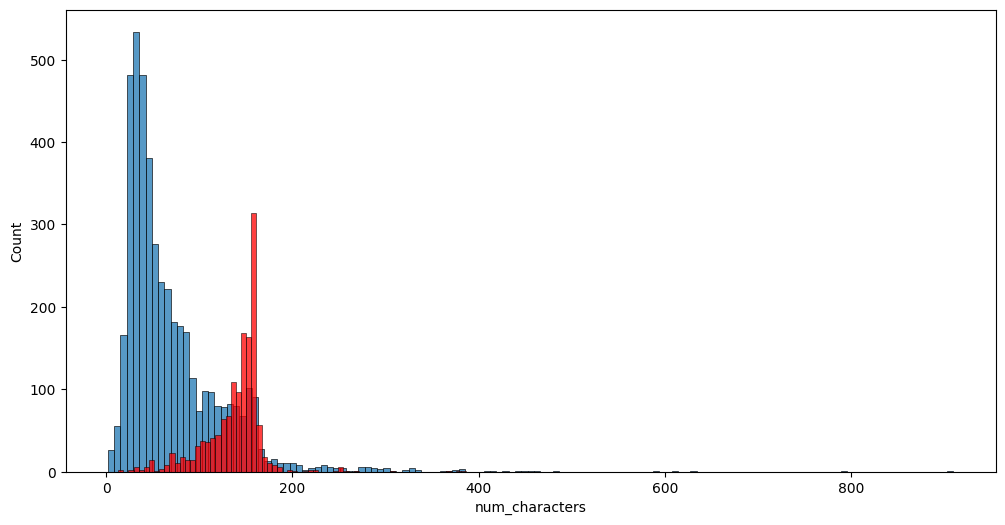

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red') 

<Axes: xlabel='num_words', ylabel='Count'>

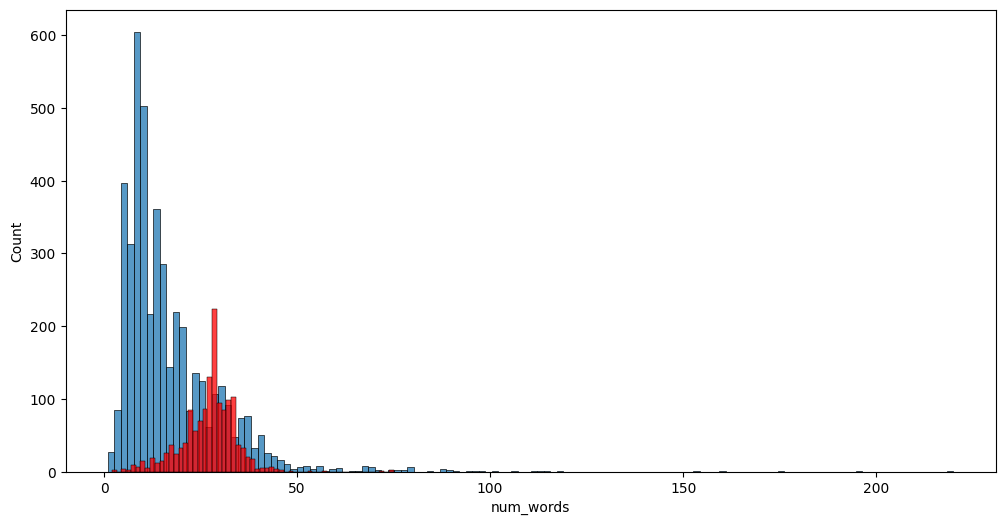

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red') 

In [37]:
#checking realtionship between columns

C:\Python 3.11\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


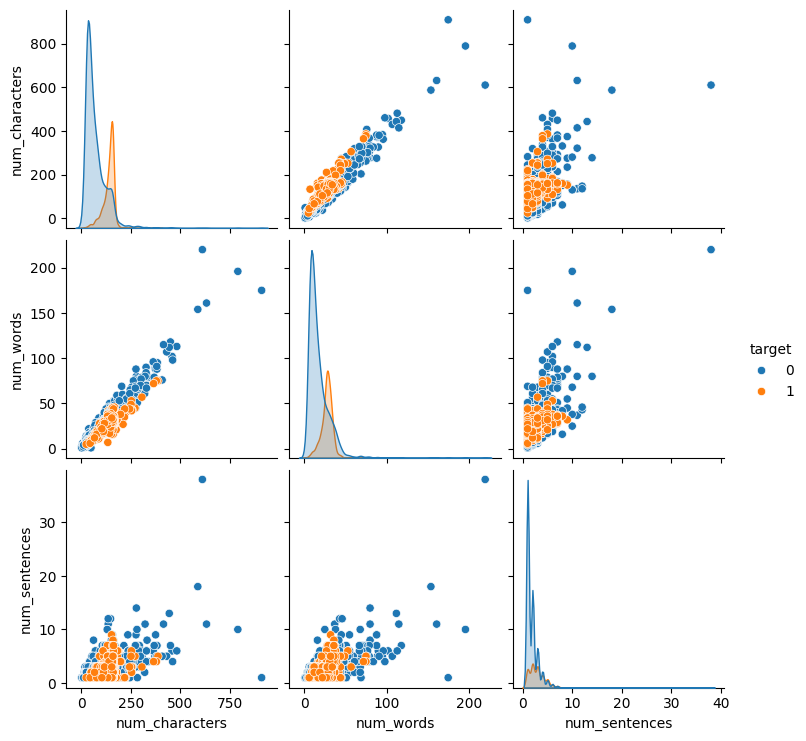

In [38]:
sns.pairplot(df,hue='target')

<Axes: xlabel='num_sentences', ylabel='Count'>

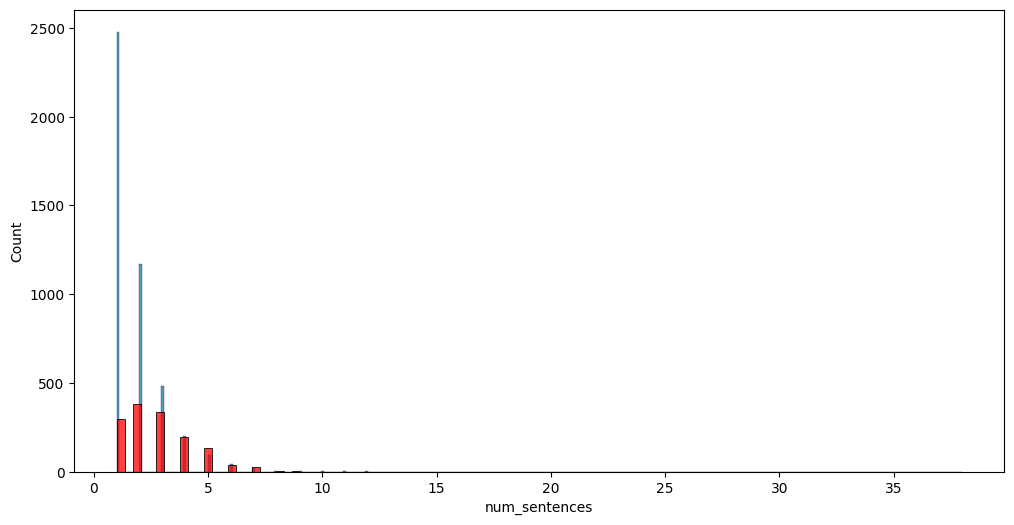

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red') 

## 3.Data Preprocessing

In [40]:
import string
from nltk.corpus import stopwords
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [41]:
#stemming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('Studying')

'studi'

In [42]:
transform_text('hi i love you.....Do you love me Kanda?')

'hi love love kanda'

In [43]:
transform_text(' I am loving a beautiful girl who always like to keep watching the show which are more scary')

'love beauti girl alway like keep watch show scari'

In [44]:
#Checking for the data in the data set
transform_text(' Is that seriously how you spell his name?')

'serious spell name'

In [45]:
df['text'][20]

'Is that seriously how you spell his name?'

In [46]:
df['transformed_text']=df['text'].apply(transform_text)

In [47]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [49]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

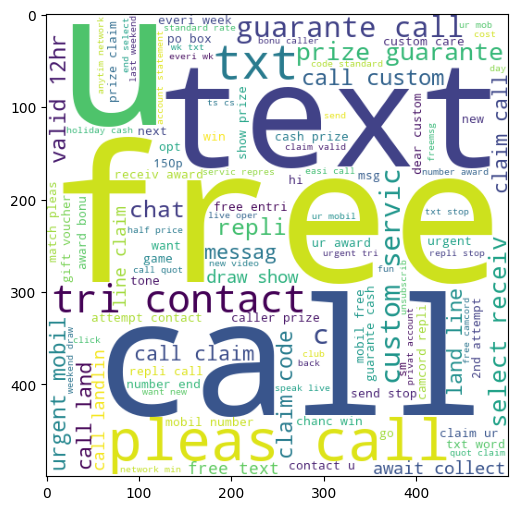

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [51]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

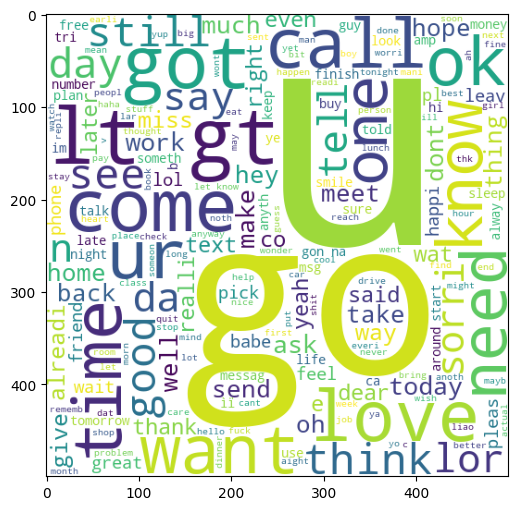

In [52]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [53]:
df[df['target']==1]

,target,text,num_characters,num_words,num_sentences,transformed_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,six chanc win cash 100 pound txt csh11 send co...
...,...,...,...,...,...,...
6688,1,More people are dogging in your area now. Call...,160,32,5,peopl dog area call 09090204448 join like mind...
6690,1,Double Mins & Double Txt & 1/2 price Call Mobi...,112,19,2,doubl min doubl txt price call mobileupd8 late...
6695,1,You have won a Nokia 7250i. This is what you g...,117,28,3,nokia 7250i get win free auction take part sen...
6696,1,Get ur 1st RINGTONE FREE NOW! Reply to this ms...,154,34,3,get ur 1st rington free repli msg tone gr8 top...


In [54]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [55]:
len(spam_corpus)

20931

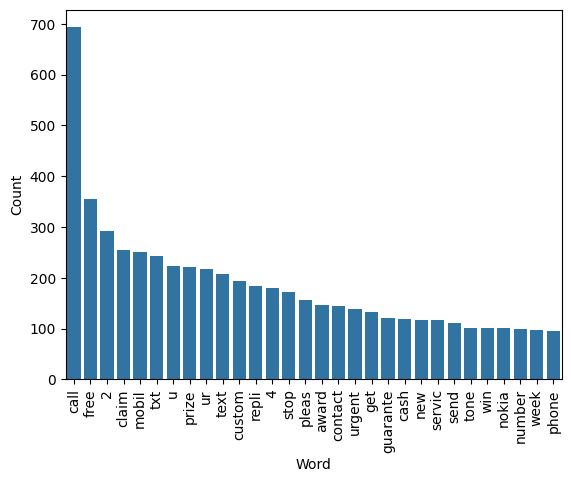

In [56]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt


word_counts = Counter(spam_corpus)


common_words_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])


sns.barplot(x='Word', y='Count', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()


In [57]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [58]:
len(ham_corpus)

35404

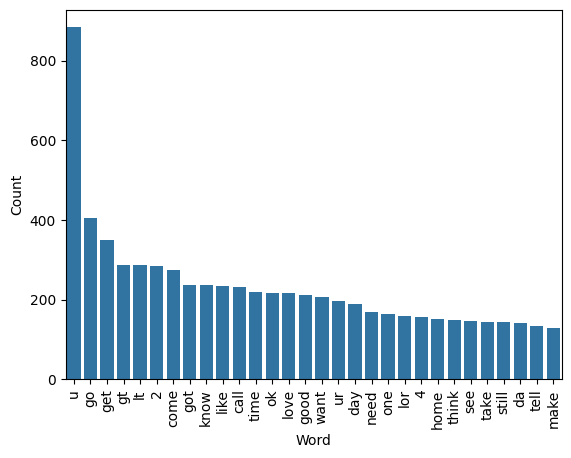

In [59]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt


word_counts = Counter(ham_corpus)


common_words_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])


sns.barplot(x='Word', y='Count', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()

## 4.Model Building

In [60]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [61]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [62]:
X.shape

(5925, 3000)

In [63]:
y=df['target'].values

In [64]:
y

array([0, 0, 1, ..., 1, 1, 1])

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [67]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [68]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [69]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8396624472573839
[[725 170]
 [ 20 270]]
0.6136363636363636


In [70]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9670886075949368
[[891   4]
 [ 35 255]]
0.9845559845559846


In [71]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9729957805907173
[[892   3]
 [ 29 261]]
0.9886363636363636


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [74]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [75]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [76]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [77]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9662447257383966, 0.9770992366412213)

In [78]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9662447257383966
Precision -  0.9770992366412213
For  KN
Accuracy -  0.8784810126582279
Precision -  1.0
For  NB
Accuracy -  0.9670886075949368
Precision -  0.9845559845559846
For  DT
Accuracy -  0.8978902953586498
Precision -  0.8894009216589862
For  LR
Accuracy -  0.9367088607594937
Precision -  0.9497907949790795
For  RF
Accuracy -  0.9789029535864979
Precision -  0.9925650557620818
For  AdaBoost
Accuracy -  0.9493670886075949
Precision -  0.9389312977099237
For  BgC
Accuracy -  0.9611814345991562
Precision -  0.9206896551724137
For  ETC
Accuracy -  0.9822784810126582
Precision -  0.996309963099631
For  GBDT
Accuracy -  0.9274261603375528
Precision -  0.9473684210526315
For  xgb
Accuracy -  0.950210970464135
Precision -  0.9459459459459459


In [79]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [80]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.878481,1.000000
8,ETC,0.982278,0.996310
5,RF,0.978903,0.992565
2,NB,0.967089,0.984556
0,SVC,0.966245,0.977099
4,LR,0.936709,0.949791
9,GBDT,0.927426,0.947368
10,xgb,0.950211,0.945946
6,AdaBoost,0.949367,0.938931
7,BgC,0.961181,0.920690


In [122]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision Score:", precision)

Accuracy: 0.980590717299578
Confusion Matrix:
 [[887   2]
 [ 21 275]]
Precision Score: 0.9927797833935018


In [81]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [82]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.878481
1,ETC,Accuracy,0.982278
2,RF,Accuracy,0.978903
3,NB,Accuracy,0.967089
4,SVC,Accuracy,0.966245
5,LR,Accuracy,0.936709
6,GBDT,Accuracy,0.927426
7,xgb,Accuracy,0.950211
8,AdaBoost,Accuracy,0.949367
9,BgC,Accuracy,0.961181


C:\Python 3.11\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


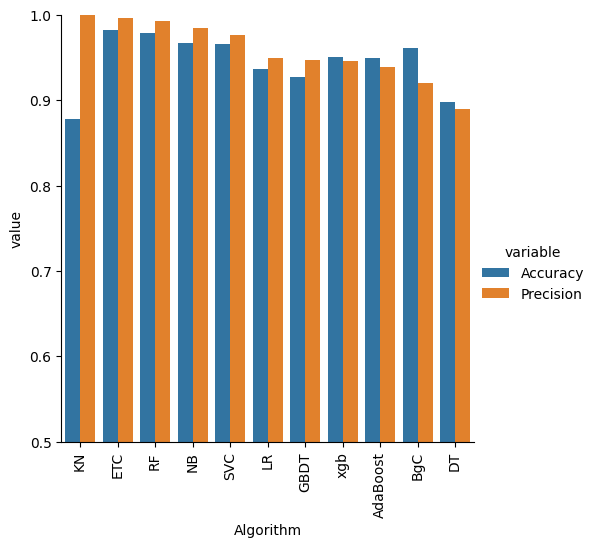

In [83]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [84]:
# Model improvement
#1.Change the max_features parameter of TfIdf

In [85]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [86]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.878481,1.000000,0.878481,1.000000
1,ETC,0.982278,0.996310,0.982278,0.996310
2,RF,0.978903,0.992565,0.978903,0.992565
3,NB,0.967089,0.984556,0.967089,0.984556
4,SVC,0.966245,0.977099,0.966245,0.977099
5,LR,0.936709,0.949791,0.936709,0.949791
6,GBDT,0.927426,0.947368,0.927426,0.947368
7,xgb,0.950211,0.945946,0.950211,0.945946
8,AdaBoost,0.949367,0.938931,0.949367,0.938931
9,BgC,0.961181,0.920690,0.961181,0.920690


In [87]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
kn= KNeighborsClassifier()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [88]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [89]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [90]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9789029535864979
Precision 0.9925650557620818


In [91]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming X_train, y_train, X_test, and y_test are your training and test data

# Train individual models
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)

svm = SVC(probability=True)  # Enable probability estimates for SVM
svm.fit(X_train, y_train)

# Make predictions
rf_pred = rf.predict(X_test)
gbm_pred = gbm.predict(X_test)
svm_pred = svm.predict(X_test)

# Combine predictions
ensemble_pred = np.round((rf_pred + gbm_pred + svm_pred) / 3)  # Simple averaging

# Evaluate ensemble performance
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
ensemble_precision = precision_score(y_test, ensemble_pred)
print("Ensemble Accuracy:", ensemble_accuracy)
print("Ensemble Precision:", ensemble_precision)

Ensemble Accuracy: 0.9755274261603376
Ensemble Precision: 0.9961977186311787


In [91]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score
# Random Forest parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
# Gradient Boosting parameter grid
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7]
}
# SVM parameter grid
svm_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

In [104]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
rf_param_distributions = {
    'n_estimators': np.linspace(100, 500, 5, dtype=int),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_random_search = RandomizedSearchCV(RandomForestClassifier(), rf_param_distributions, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
rf_random_search.fit(X_train, y_train)
best_rf = rf_random_search.best_estimator_


In [106]:
gb_param_distributions = {
    'n_estimators': np.linspace(100, 300, 3, dtype=int),
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7]
}

gb_random_search = RandomizedSearchCV(GradientBoostingClassifier(), gb_param_distributions, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
gb_random_search.fit(X_train, y_train)
best_gbm = gb_random_search.best_estimator_

In [107]:
svm_param_distributions = {
    'C': np.logspace(-2, 2, 5),
    'gamma': ['scale', 'auto']
}
svm_random_search = RandomizedSearchCV(SVC(probability=True), svm_param_distributions, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
svm_random_search.fit(X_train, y_train)
best_svm = svm_random_search.best_estimator_

In [108]:
# Simple averaging ensemble prediction; assuming binary classification
rf_pred = best_rf.predict_proba(X_test)[:, 1]
gbm_pred = best_gbm.predict_proba(X_test)[:, 1]
svm_pred = best_svm.predict_proba(X_test)[:, 1]

# Combine predictions with equal weights as an example
ensemble_pred = np.round((rf_pred + gbm_pred + svm_pred) / 3).astype(int)

# Evaluate Ensemble Model
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
ensemble_precision = precision_score(y_test, ensemble_pred)

print(f"Ensemble Accuracy: {ensemble_accuracy}")
print(f"Ensemble Precision: {ensemble_precision}")


Ensemble Accuracy: 0.9848101265822785
Ensemble Precision: 0.9964285714285714


In [121]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Define the Extra Trees Classifier with default parameters
etc = ExtraTreesClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform Grid Search Cross-Validation to find the best hyperparameters
grid_search = GridSearchCV(etc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_etc = grid_search.best_estimator_

# Train the model using the best estimator
best_etc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_etc.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision Score:", precision)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 0.979746835443038
Confusion Matrix:
 [[884   5]
 [ 19 277]]
Precision Score: 0.9822695035460993


In [112]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=ExtraTreesClassifier()

In [113]:
from sklearn.ensemble import StackingClassifier

In [114]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [115]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9856540084388186
Precision 0.9894736842105263


In [118]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

['tfidf_vectorizer.joblib']

In [123]:
import joblib

# Assuming you have trained your ExtraTreesClassifier model (`etc`) and TF-IDF vectorizer (`tfidf`)

# Save the ExtraTreesClassifier model using joblib
joblib.dump(etc, 'etc_model.joblib')

# Save the TF-IDF vectorizer using joblib
joblib.dump(tfidf, 'tfidf_vectorizer.joblib')


['tfidf_vectorizer.joblib']